# Eksploracja, wykresy, regresja

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

Pokażę proste metody statystyczne takie jak regresja liniowa.

[SkillCraft - zbiór danych](http://summit.sfu.ca/item/13328 ) graczy z rozgrywek w strategię czasu rzeczywistego  [StarCraft 2](https://en.wikipedia.org/wiki/StarCraft_II:_Wings_of_Liberty), związanych a artykułem:

* Thompson JJ, Blair MR, Chen L, Henrey AJ (2013) [Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning.](http://dx.doi.org/10.1371/journal.pone.0075129) PLoS ONE 8(9): e75129.

Skrótowe infromacje w [tym archiwum](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset), w szczególności opis zmiennych (przedstawiamy wybrane):

> * `2.` LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal) 
* `3.` Age: Age of each player (integer) 
* `4.` HoursPerWeek: Reported hours spent playing per week (integer) 
* `5.` TotalHours: Reported total hours spent playing (integer) 
* `6.` APM: Action per minute (continuous) 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("../dane/SkillCraft1_Dataset.csv", na_values=["?"])

In [17]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


In [8]:
df.groupby("LeagueIndex").size()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [9]:
df[df.LeagueIndex == 7].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
104,357,7,21,24,1000,286.4538,0.017852,0.000717,6,0.000049,0.001298,0.006206,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000
119,398,7,24,16,1250,216.6852,0.011957,0.000396,6,0.000528,0.000839,0.005691,21.6119,32.6225,5.0083,33,0.000688,8,0.000038,0.000000
320,953,7,25,42,2400,182.6208,0.005607,0.000310,8,0.000203,0.000662,0.005254,24.4969,38.6260,5.4065,18,0.001164,7,0.000000,0.000000
368,1096,7,19,56,1700,130.8600,0.003419,0.000552,5,0.000104,0.000069,0.003108,18.7416,52.3111,6.6667,15,0.000932,5,0.000000,0.000000


In [10]:
df[df.LeagueIndex == 8].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0


In [12]:
df[df.LeagueIndex == 8].count()

GameID                  55
LeagueIndex             55
Age                      0
HoursPerWeek             0
TotalHours               0
APM                     55
SelectByHotkeys         55
AssignToHotkeys         55
UniqueHotkeys           55
MinimapAttacks          55
MinimapRightClicks      55
NumberOfPACs            55
GapBetweenPACs          55
ActionLatency           55
ActionsInPAC            55
TotalMapExplored        55
WorkersMade             55
UniqueUnitsMade         55
ComplexUnitsMade        55
ComplexAbilitiesUsed    55
dtype: int64

In [18]:
df_mniej = df[df.LeagueIndex < 7]

In [14]:
df_mniej.groupby("LeagueIndex").size()

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
dtype: int64

In [19]:
df = df_mniej

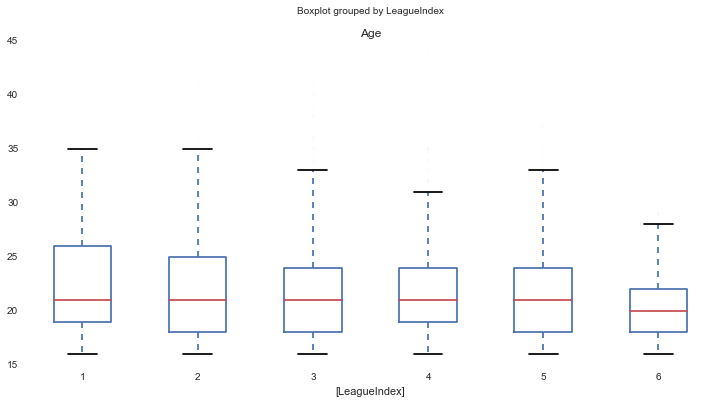

In [21]:
df[["LeagueIndex","Age"]].boxplot(by="LeagueIndex", figsize=(12,6))

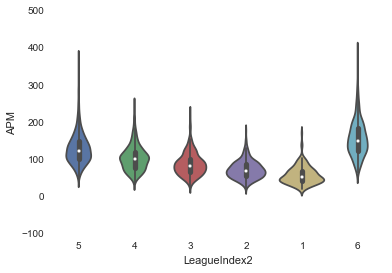

In [64]:
sns.violinplot("LeagueIndex2", "APM", data=df)

In [24]:
# for k, v in df_mniej.groupby("LeagueIndex")['APM']:
#    print("LeagueIndex: ", k)
#    print(v)

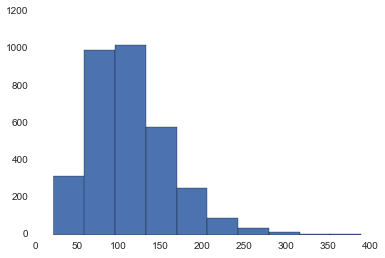

In [26]:
df['APM'].hist()

In [42]:
# df[df["LeagueIndex"]isin([1, 6])]

In [54]:
kolorki = ["#555555", "#111111", "#111111", "#111111", "#111111", "#ff0000"]

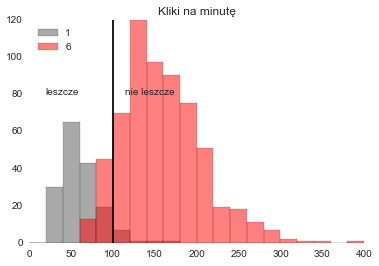

In [68]:
for nr_ligi, gracze in df.query("LeagueIndex in [1,6]").groupby("LeagueIndex")['APM']:
    gracze.hist(range=(0, 400), bins=20, alpha=0.5, label=str(nr_ligi), color=kolorki[nr_ligi-1])
plt.legend(loc="upper left")
plt.title("Kliki na minutę")
plt.vlines(100, 0, 120)
plt.text(20, 80, "leszcze")
plt.text(df["APM"].mean(), 80, "nie leszcze")

In [43]:
grupy = df.groupby("LeagueIndex")

In [56]:
grupy.get_group(3).head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019
10,83,3,16,16,6000,153.8010,0.001677,0.000319,4,0.000000,0.000822,0.003772,23.4107,48.0711,7.0044,24,0.001593,7,0,0.000017
12,97,3,18,12,350,67.4754,0.000423,0.000169,1,0.000024,0.000145,0.002885,42.4370,68.0502,4.3222,16,0.000748,7,0,0.000435
13,98,3,38,6,1000,119.4366,0.004952,0.000052,2,0.000087,0.000035,0.002728,54.8718,79.2102,6.2293,21,0.001494,5,0,0.000000


In [70]:
df["Age"].median()

21.0

In [79]:
df["HoursPerWeek"].median()

12.0

In [78]:
df["mlody"] = df["Age"] < df["Age"].median()
df["maniacy"] = df["HoursPerWeek"] > df["HoursPerWeek"].median()

In [74]:
df["mlody"].head()

0    False
1    False
2    False
3     True
4    False
Name: mlody, dtype: bool

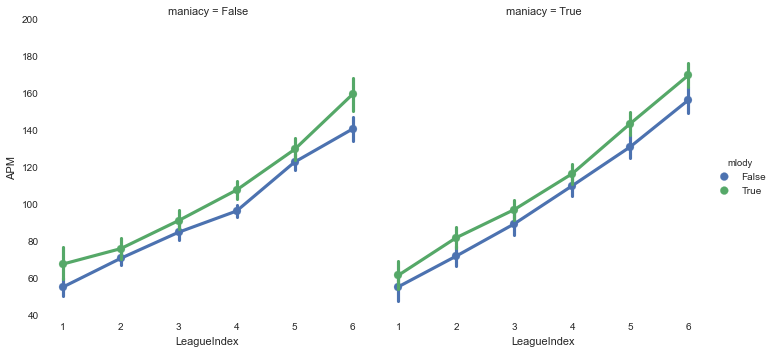

In [80]:
sns.factorplot("LeagueIndex", "APM", data=df, hue="mlody", col="maniacy",
               kind="point")

In [81]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,mlody,maniacy
count,3305.000000,3305.000000,3305.000000,3304.000000,3303.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,...,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305.000000,3305,3305
mean,4718.986989,4.090772,21.652950,15.743341,953.845595,113.777963,0.003967,0.000360,4.289561,0.000091,...,40.901643,64.458945,5.266766,22.057186,0.001029,6.535552,0.000060,0.000141,0.4499244,0.4623298
std,2655.043173,1.424743,4.218278,11.729187,17408.749363,47.546823,0.004690,0.000206,2.324981,0.000155,...,17.033924,18.961527,1.504577,7.408934,0.000518,1.857847,0.000111,0.000260,0.4975614,0.4986544
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000,False,False
25%,2430.000000,3.000000,19.000000,8.000000,300.000000,78.873600,0.001238,0.000201,3.000000,0.000000,...,29.536900,51.285300,4.258500,17.000000,0.000681,5.000000,0.000000,0.000000,0,0
50%,4789.000000,4.000000,21.000000,12.000000,500.000000,106.621800,0.002401,0.000347,4.000000,0.000038,...,37.268800,61.445300,5.084500,22.000000,0.000903,6.000000,0.000000,0.000020,0,0
75%,6993.000000,5.000000,24.000000,20.000000,800.000000,139.340400,0.004825,0.000491,6.000000,0.000110,...,48.650000,74.216200,6.026000,27.000000,0.001257,8.000000,0.000087,0.000180,1,1
max,9271.000000,6.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,...,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084,True,True


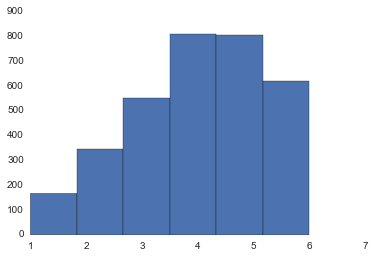

In [87]:
# wyższa liga, lepiej
df["LeagueIndex"].hist(bins=6)

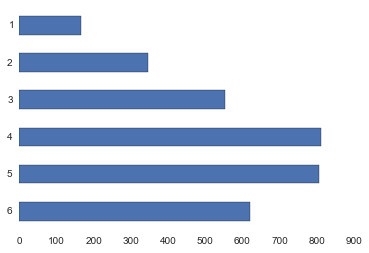

In [95]:
df["LeagueIndex"].value_counts().sort_index(ascending=False).plot(kind='barh')

In [117]:
df_some = df.loc[:,"LeagueIndex":"APM"]

In [120]:
# absurdlanie wysoki HoursPlayed
df_some = df_some.drop(1793)

ValueError: labels [1793] not contained in axis

In [121]:
df_some.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
0,5,27,10,3000,143.7180
1,5,23,10,5000,129.2322
2,4,30,10,200,69.9612
3,3,19,20,400,107.6016
4,3,32,10,500,122.8908


In [99]:
df_some.corr?

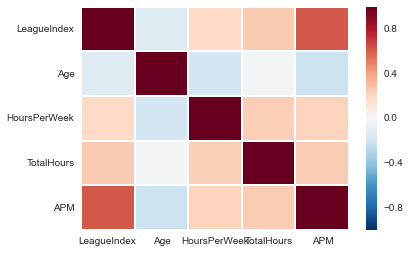

In [122]:
sns.heatmap(df_some.corr())

In [123]:
df_some.corr(method='spearman')

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
LeagueIndex,1.000000,-0.082059,0.212444,0.490030,0.653109
Age,-0.082059,1.000000,-0.209337,-0.024744,-0.187513
HoursPerWeek,0.212444,-0.209337,1.000000,0.444848,0.242460
TotalHours,0.490030,-0.024744,0.444848,1.000000,0.391505
APM,0.653109,-0.187513,0.242460,0.391505,1.000000


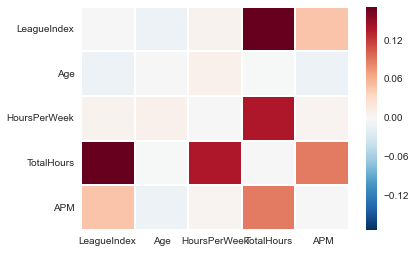

In [124]:
sns.heatmap(df_some.corr(method='spearman')**2 - df_some.corr(method='pearson')**2)

/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


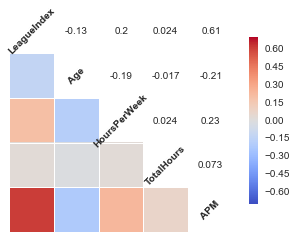

In [101]:
sns.corrplot(df_some)

In [103]:
for col in df_some:
    print(col)

LeagueIndex
Age
HoursPerWeek
TotalHours
APM


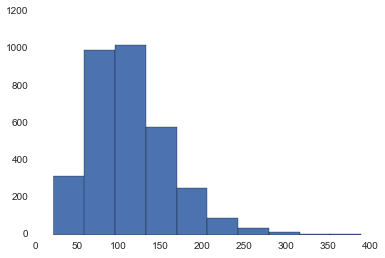

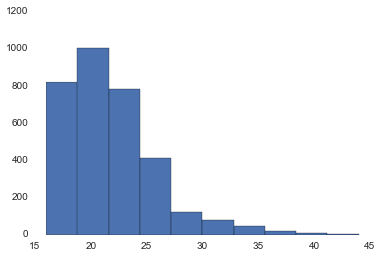

In [105]:
df_some["APM"].hist()
plt.show()
df_some["Age"].hist()
# plt.show()

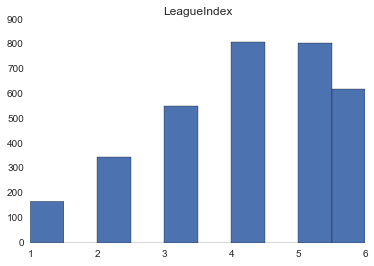

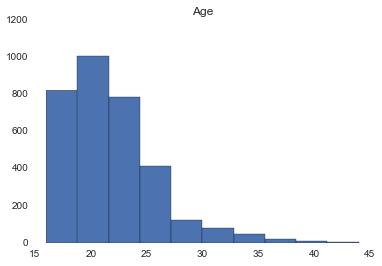

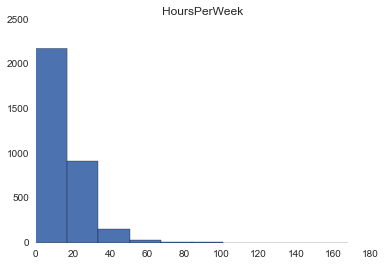

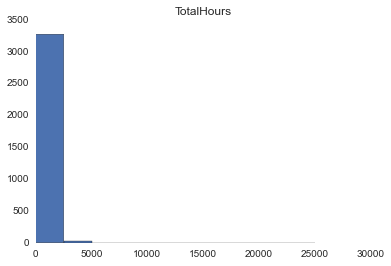

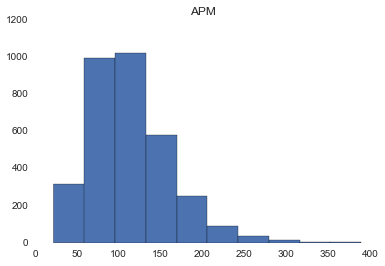

In [125]:
for col in df_some:
    df_some[col].hist()
    plt.title(col)
    plt.show()

In [111]:
df_some["TotalHours"].max() / (24 * 365)

114.15525114155251

In [112]:
df_some[df_some["TotalHours"] == 1000000]

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM
1793,5,18,24,1000000,281.4246


In [114]:
df_some = df_some.drop(1793)

In [115]:
df_some["TotalHours"].max()

25000.0

In [116]:
25000 / (16 * 365)

4.280821917808219

In [ ]:
# "SelfReported"

In [134]:
df_przeskalowane = df_some.query("HoursPerWeek > 0")[["LeagueIndex"]].copy()
for col in df_some.columns[1:]:
    df_przeskalowane[col + "_log10"] = np.log10(df_some[col])

In [135]:
df_przeskalowane.head()

,LeagueIndex,Age_log10,HoursPerWeek_log10,TotalHours_log10,APM_log10
0,5,1.431364,1.00000,3.477121,2.157511
1,5,1.361728,1.00000,3.698970,2.111371
2,4,1.477121,1.00000,2.301030,1.844857
3,3,1.278754,1.30103,2.602060,2.031819
4,3,1.505150,1.00000,2.698970,2.089519


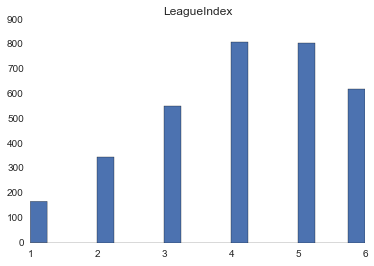

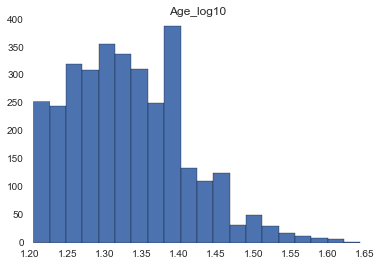

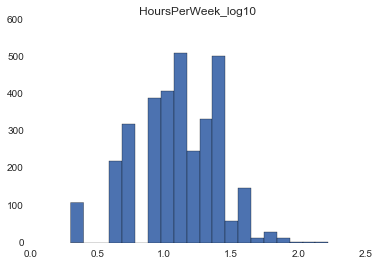

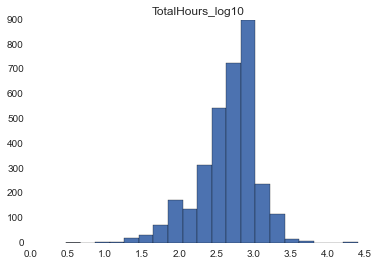

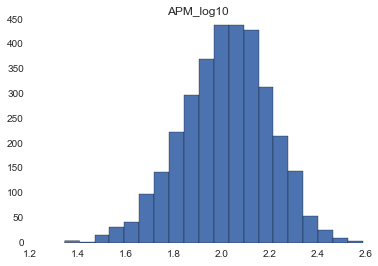

In [137]:
# Wydaje sie, ze dla wszystkiego procz ligii lepsza bylaby skala logarytmiczna
for col in df_przeskalowane:
    df_przeskalowane[col].hist(bins=20)
    plt.title(col)
    plt.show()

In [146]:
sns.jointplot?

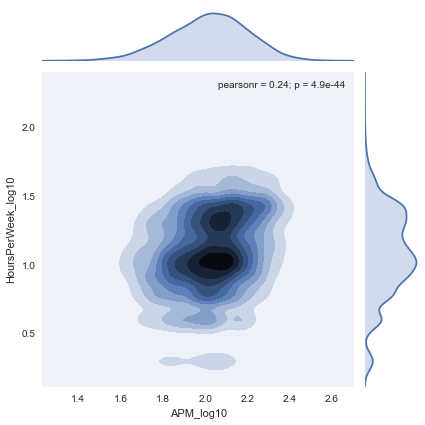

In [147]:
sns.jointplot(x="APM_log10", y="HoursPerWeek_log10",
              data=df_przeskalowane, kind="kde")

In [153]:
df_przeskalowane = df_przeskalowane.drop("League", axis=1)

In [157]:
df_przeskalowane.columns

Index(['LeagueIndex', 'Age_log10', 'HoursPerWeek_log10', 'TotalHours_log10',
       'APM_log10'],
      dtype='object')

In [156]:
sns.pairplot?

In [163]:
sns.pairplot?

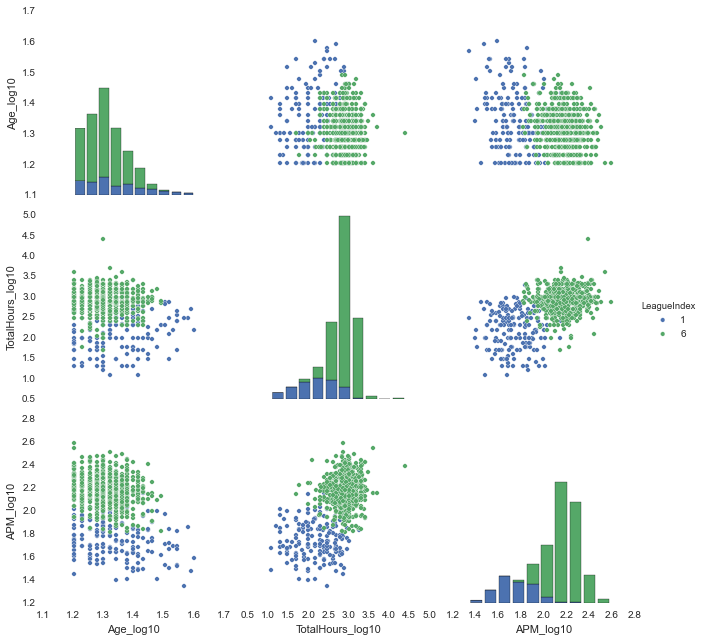

In [162]:
sns.pairplot(df_przeskalowane.query("LeagueIndex in [1,6]"),
             hue="LeagueIndex",
             vars=['Age_log10', 'TotalHours_log10', 'APM_log10'])

/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


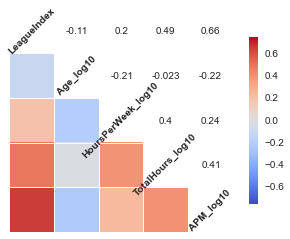

In [159]:
sns.corrplot(df_przeskalowane)

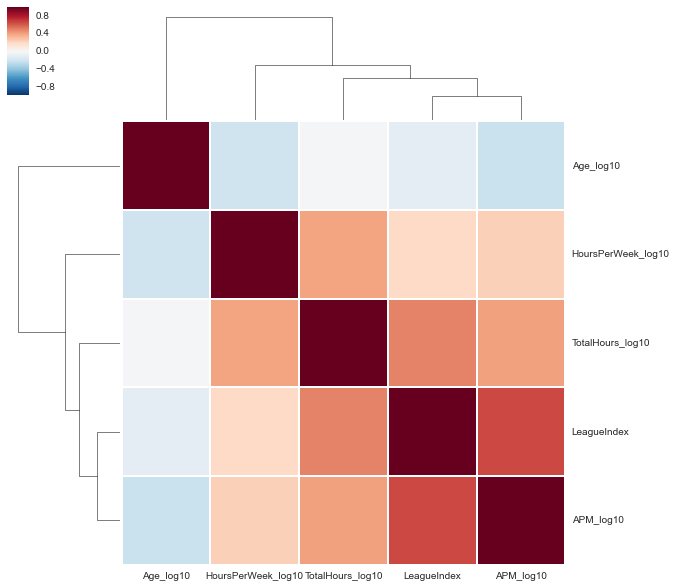

In [160]:
sns.clustermap(df_przeskalowane.corr())

In [164]:
from sklearn import linear_model

In [183]:
df_z = (df_przeskalowane - df_przeskalowane.mean())/df_przeskalowane.std()
df_z = df_z.dropna()

Y = df_z["LeagueIndex"].values
X = df_z.iloc[:,1:].values

In [184]:
df_przeskalowane.std()

LeagueIndex           1.424827
Age_log10             0.079649
HoursPerWeek_log10    0.310357
TotalHours_log10      0.397503
APM_log10             0.183097
dtype: float64

In [185]:
df_z["LeagueIndex"].head().values

array([ 0.63892483,  0.63892483, -0.06291475, -0.76475434, -0.76475434])

In [186]:
df_z.drop("LeagueIndex", axis=1).values

array([[ 1.29725645, -0.29893301,  2.06416309,  0.7587333 ],
       [ 0.42297586, -0.29893301,  2.62226963,  0.50673397],
       [ 1.87174274, -0.29893301, -0.89453844, -0.948849  ],
       ..., 
       [-0.07305473, -0.61118685, -1.65184183,  0.36427967],
       [-0.33908684,  1.1418553 , -0.13723504,  0.59770259],
       [ 0.18059922, -1.01375207, -0.13723504, -0.38261486]])

In [187]:
df_z.mean()

LeagueIndex          -1.935549e-04
Age_log10             3.711705e-04
HoursPerWeek_log10   -2.032766e-04
TotalHours_log10      4.932964e-14
APM_log10             7.161446e-05
dtype: float64

In [167]:
df_z.std()

LeagueIndex           1
Age_log10             1
HoursPerWeek_log10    1
TotalHours_log10      1
APM_log10             1
dtype: float64

In [188]:
X.shape

(3301, 4)

In [189]:
Y.shape

(3301,)

In [190]:
reg = linear_model.LinearRegression()

In [191]:
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [192]:
reg.coef_

array([ 0.0111973 , -0.04707185,  0.28651251,  0.55633108])

In [193]:
df_z.columns

Index(['LeagueIndex', 'Age_log10', 'HoursPerWeek_log10', 'TotalHours_log10',
       'APM_log10'],
      dtype='object')

In [194]:
wspolczynniki = pd.Series(reg.coef_, index=df_z.columns[1:])
wspolczynniki

Age_log10             0.011197
HoursPerWeek_log10   -0.047072
TotalHours_log10      0.286513
APM_log10             0.556331
dtype: float64

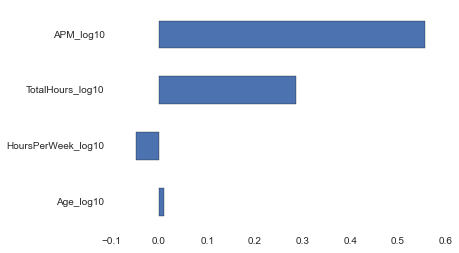

In [196]:
wspolczynniki.plot(kind='barh')

In [38]:
reg_lasso = linear_model.Lasso(alpha=0.001)
reg_lasso.fit(X, Y)
reg_lasso.coef_

array([ 0.01409089, -0.03627548,  0.27742002,  0.56214952])

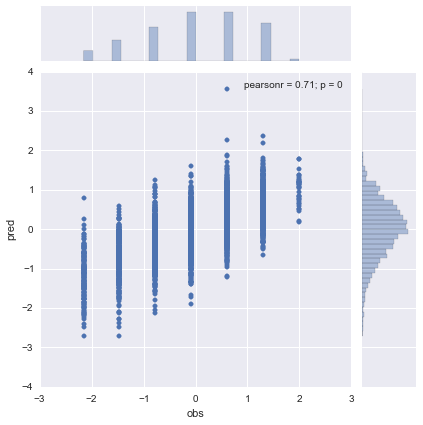

In [39]:
predykcja = pd.DataFrame({'obs': Y, 'pred': reg.predict(X)})
sns.jointplot(x="obs", y="pred", data=predykcja)

## Zobacz też

* [Statistical functions (scipy.stats)¶](http://docs.scipy.org/doc/scipy/reference/stats.html)
* [http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb)
